### 📦 Cargar modelo entrenado

In [11]:
import joblib
model = joblib.load("models/RandomForest.pkl")

### 📊 Cargar datos de validación

In [13]:
import pandas as pd

X_val = pd.read_csv("../processed_data/X_val.csv")
y_val = pd.read_csv("../processed_data/y_val.csv")

### 🔮 Hacer predicciones

In [14]:
y_pred = model.predict(X_val)

### 📉 Evaluar métricas

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


MSE: 3.9509
MAE: 1.3568


### 📊 Visualizaciones

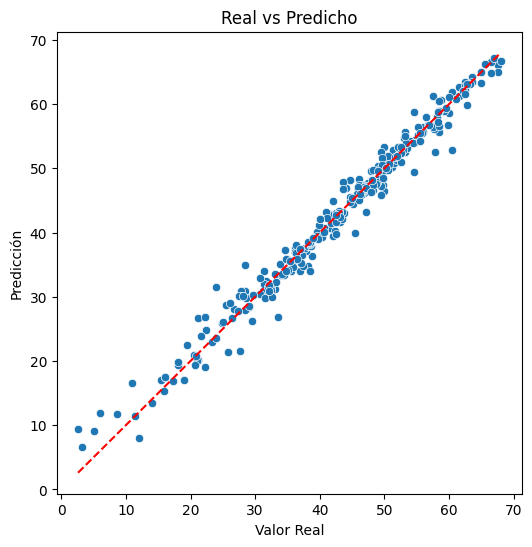

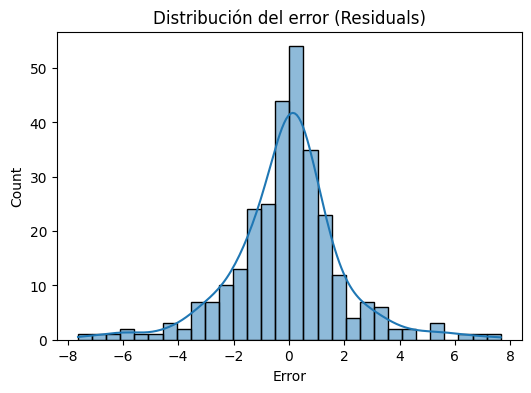

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Real vs Predicho
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val.values.ravel(), y=y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.plot([y_val.values.min(), y_val.values.max()], [y_val.values.min(), y_val.values.max()], '--r')
plt.savefig("../results/real_vs_predicho.png")
plt.show()

# Distribución del error
errors = y_val.values.flatten() - y_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribución del error (Residuals)")
plt.xlabel("Error")
plt.savefig("../results/error_distribution.png")
plt.show()


### 📁 Exportar predicciones

In [19]:
pred_df = pd.DataFrame({"y_real": y_val.values.flatten(), "y_pred": y_pred})
pred_df.to_csv("../results/random_forest_predictions.csv", index=False)

### 📌 Registrar todo en MLflow

In [20]:
import mlflow

with mlflow.start_run(run_name="RandomForest-Evaluacion"):

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)

    mlflow.log_artifact("../results/random_forest_predictions.csv")
    mlflow.log_artifact("../results/real_vs_predicho.png")
    mlflow.log_artifact("../results/error_distribution.png")

    mlflow.sklearn.log_model(model, artifact_path="random_forest_model")

2025/07/20 19:51:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/20 19:52:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/20 19:52:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ 1. Carga del modelo ganador

In [22]:
import joblib

best_model = joblib.load("models/RandomForest.pkl")

✅ 2. Carga de los datos de prueba

In [23]:
import pandas as pd

X_test = pd.read_csv("../processed_data/X_test.csv")
y_test = pd.read_csv("../processed_data/y_test.csv")

✅ 3. Predicciones

In [24]:
y_pred = best_model.predict(X_test)

✅ 4. Evaluación final (MSE y MAE)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 6.9491
MAE: 1.7341


✅ 5. Visualización: Real vs Predicho

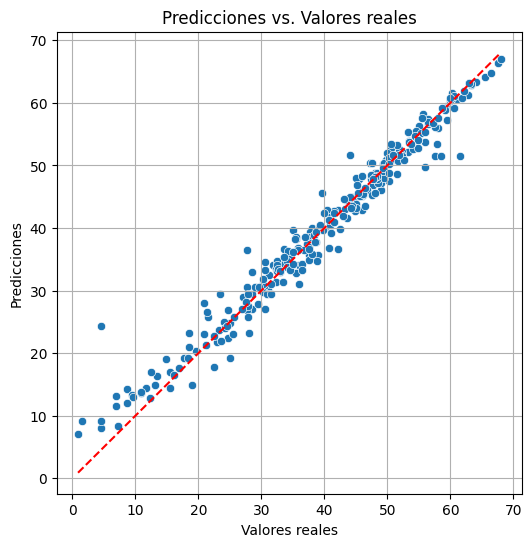

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores reales")
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], '--r')  # línea diagonal
plt.grid(True)
plt.show()

✅ 6. Exportar predicciones a CSV

In [30]:
pd.DataFrame({"y_real": y_test.values.ravel(), "y_pred": y_pred.ravel()}).to_csv("../results/random_forest_predictions.csv", index=False)
